# Model Building Classification
- In this notebook, I will build a classification model that will predict the prices of restaurants in Toronto, Canada
- The type of machine learning algorithms that will be used on this model are:
    - Logistic Regression
    - K-Nearest Neighbours
    - Decision Tree Classification
    - Random Forest Classification
- This notebook also handles the issue of an **imbalanced dataset**
    - In order to correct this issue, we use a python library **imblearn** to account and balance out the dataset to feed into our machine learning model

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yelp_foods_cleaned2.csv')

In [3]:
df.head()

Name  # of Reviews  Rating  Price   Cuisine  \
0               Panera Bread            82     3.0      2  American   
1  Pai Northern Thai Kitchen          2862     4.5      2     Asian   
2             Beefing with 7            17     4.5      0     Asian   
3                       Mira           218     4.5      2  European   
4           Richmond Station           764     4.5      3  American   

            Neighbourhood    Price_  New_Price  
0              Unionville       NaN        2.0  
1  Entertainment District  2.472727        2.0  
2              Willowdale  2.000000        2.0  
3  Entertainment District  2.472727        2.0  
4           Downtown Core  2.101695        3.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           925 non-null    object 
 1   # of Reviews   925 non-null    int64  
 2   Rating         925 non-null    float64
 3   Price          925 non-null    int64  
 4   Cuisine        925 non-null    object 
 5   Neighbourhood  925 non-null    object 
 6   Price_         807 non-null    float64
 7   New_Price      920 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 57.9+ KB


In [5]:
df.describe().transpose()

count        mean         std  min        25%   50%         75%  \
# of Reviews  925.0  149.459459  202.221231  1.0  35.000000  82.0  189.000000   
Rating        925.0    3.988649    0.452424  2.5   3.500000   4.0    4.500000   
Price         925.0    1.695135    1.003257  0.0   1.000000   2.0    2.000000   
Price_        807.0    2.088229    0.250863  1.6   1.857143   2.0    2.285714   
New_Price     920.0    2.094565    0.544807  1.0   2.000000   2.0    2.000000   

                      max  
# of Reviews  2862.000000  
Rating           5.000000  
Price            4.000000  
Price_           2.722222  
New_Price        4.000000

In [6]:
# Choosing Relevant Columns
# Categorical/Dummy Data
# Train-Test-Split
# Classification ML Algorithms
# KNN, Random Forest, Decision Tree, Logistic Regression

In [7]:
# Choosing Relevant columns
df1 = df[['Name','# of Reviews','Rating','Cuisine','Neighbourhood','New_Price']]
df1.head()

Name  # of Reviews  Rating   Cuisine  \
0               Panera Bread            82     3.0  American   
1  Pai Northern Thai Kitchen          2862     4.5     Asian   
2             Beefing with 7            17     4.5     Asian   
3                       Mira           218     4.5  European   
4           Richmond Station           764     4.5  American   

            Neighbourhood  New_Price  
0              Unionville        2.0  
1  Entertainment District        2.0  
2              Willowdale        2.0  
3  Entertainment District        2.0  
4           Downtown Core        3.0

In [8]:
df_dum = pd.get_dummies(df1.drop('Name',axis=1))

In [9]:
df_dum.head()

# of Reviews  Rating  New_Price  Cuisine_African  Cuisine_American  \
0            82     3.0        2.0                0                 1   
1          2862     4.5        2.0                0                 0   
2            17     4.5        2.0                0                 0   
3           218     4.5        2.0                0                 0   
4           764     4.5        3.0                0                 1   

   Cuisine_Asian  Cuisine_Carribean  Cuisine_European  Cuisine_Mexican  \
0              0                  0                 0                0   
1              1                  0                 0                0   
2              1                  0                 0                0   
3              0                  0                 1                0   
4              0                  0                 0                0   

   Cuisine_Middle Eastern  ...  Neighbourhood_University of Toronto  \
0                       0  ...                                    0   
1                       0  ...                                    0   
2                       0  ...                                    0   
3                       0  ...                                    0   
4                       0  ...                                    0   

   Neighbourhood_Upper Beach  Neighbourhood_West Don Lands  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   

   Neighbourhood_West Queen West  Neighbourhood_Willowdale  \
0                              0                         0   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         0   

   Neighbourhood_Wychwood  Neighbourhood_Yonge and Eglinton  \
0                       0                                 0   
1                       0                                 0   
2                       0                                 0   
3                       0                                 0   
4                       0                                 0   

   Neighbourhood_Yonge and St. Clair  Neighbourhood_York  \
0                                  0                   0   
1                                  0                   0   
2                                  0                   0   
3                                  0                   0   
4                                  0                   0   

   Neighbourhood_Yorkville  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 86 columns]

In [10]:
# There were 5 records in the dataset that had a nan price, which we could not get an average price from the neighbourhood
# Thus, these values were dropped
df_dum.dropna(inplace=True)

In [11]:
df['New_Price'].value_counts()

2.0    720
3.0    103
1.0     70
4.0     27
Name: New_Price, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


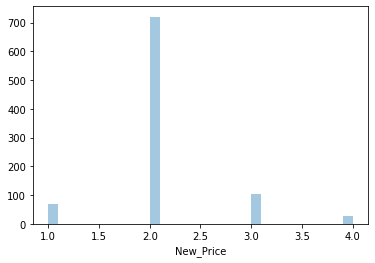

In [12]:
sns.distplot(df['New_Price'],kde=False)

- From this histogram, we can clearly see that this data is **skewed** and **imbalanced**. There are alot more records that have a 2.0 price score than any other price.
- This imbalance data will cause issues in our model if we continue with this dataset, as the model might overfit the label that is more represented in the dataset. 
- In this case, Price (2) may be overfitted if we continue with this dataset, although using this dataset may result in a good accuracy score, it will most likely fail in reality as overfitting will occur
- In order to account for the imbalance in this data set, we will use a library, **imblearn** and an **over-sampling** technique to balance the data
- This technique will create new and balanced data that we will then feed into our machine learning model to achieve a better accuracy and score

# Handling imbalance dataset

In [13]:
# Separating classes 1, 2, 3 ,4
one = df[df['New_Price'] == 1]
two = df[df['New_Price'] == 2]
three = df[df['New_Price'] == 3]
four = df[df['New_Price'] == 4]

In [14]:
print('Shape of price = 1:',one.shape)
print('Shape of price = 2:',two.shape)
print('Shape of price = 3:',three.shape)
print('Shape of price = 4:',four.shape)

Shape of price = 1: (70, 8)
Shape of price = 2: (720, 8)
Shape of price = 3: (103, 8)
Shape of price = 4: (27, 8)


- Again, we can clearly see there is much more records of data when price = 2, than any other data

- In this part of the project, I will handle imbalance data with 2 different techniques in the **imblearn** library:
    - RandomOverSampler
    - SMOTETomek

In [182]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

In [75]:
X = df_dum.drop('New_Price',axis=1)
y = df_dum['New_Price'].values

In [76]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 27)

In [183]:
# Implementing Oversampling for Handling Imbalanced 
one = 1.0
os =  RandomOverSampler(ratio=one)
sm = SMOTETomek(ratio=one)

In [184]:
# Original X_train shape and y_train shape
print('Shape of X:',X_train.shape)
print('Shape of y:',y_train.shape)

Shape of X: (644, 85)
Shape of y: (644, 1)


# Model Building
- For the model building process, I decided to use a couple different Machine Learning Algorithms:
    - K-Nearest Neighbours
    - Decision Tree Classification
    - Random Forest Classification
    - Logistic Regression

## K-Nearest Neighbours

### RandomOverSampler

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [129]:
# RandomOverSampler
X_train_ros, y_train_ros = os.fit_sample(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [130]:
y_train_ros_df = pd.DataFrame(y_train_ros, columns =['Price'])
y_train_ros_df['Price'].value_counts()

4.0    503
1.0    503
3.0    503
2.0    503
Name: Price, dtype: int64

In [131]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_ros)))

Original dataset shape Counter({2.0: 720, 3.0: 103, 1.0: 70, 4.0: 27})
Resampled dataset shape Counter({2.0: 503, 3.0: 503, 1.0: 503, 4.0: 503})


In [132]:
knn_df = KNeighborsClassifier(n_neighbors=5)

In [133]:
knn_df.fit(X_train_ros,y_train_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [134]:
pred = knn_df.predict(X_test)

In [135]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        1.0       0.10      0.24      0.14        17
        2.0       0.79      0.52      0.63       217
        3.0       0.17      0.34      0.23        35
        4.0       0.13      0.43      0.20         7

avg / total       0.66      0.47      0.53       276



In [136]:
error_rate = []

for i in range(1,40): 
    knn_df = KNeighborsClassifier(n_neighbors=i)
    knn_df.fit(X_train_ros,y_train_ros)
    pred_i = knn_df.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

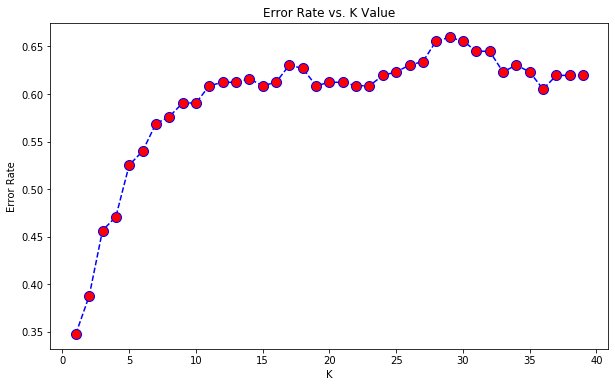

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [138]:
knn_df = KNeighborsClassifier(n_neighbors=2)

knn_df.fit(X_train_ros,y_train_ros)
pred = knn_df.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[  3   9   2   3]
 [ 31 155  24   7]
 [  1  25   8   1]
 [  0   2   2   3]]


             precision    recall  f1-score   support

        1.0       0.09      0.18      0.12        17
        2.0       0.81      0.71      0.76       217
        3.0       0.22      0.23      0.23        35
        4.0       0.21      0.43      0.29         7

avg / total       0.68      0.61      0.64       276



### SMOTETomek

In [139]:
# SMOTETomek
X_train_smk,y_train_smk=smk.fit_sample(X_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [140]:
y_train_smk_df = pd.DataFrame(y_train_smk, columns =['Price'])
y_train_smk_df['Price'].value_counts()

1.0    479
4.0    469
3.0    469
2.0    461
Name: Price, dtype: int64

In [141]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smk)))

Original dataset shape Counter({2.0: 720, 3.0: 103, 1.0: 70, 4.0: 27})
Resampled dataset shape Counter({1.0: 479, 3.0: 469, 4.0: 469, 2.0: 461})


In [142]:
knn_df_s = KNeighborsClassifier(n_neighbors=1)

In [143]:
knn_df_s.fit(X_train_smk,y_train_smk)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [144]:
pred_smote = knn_df_s.predict(X_test)

In [145]:
print(classification_report(y_test,pred_smote))

             precision    recall  f1-score   support

        1.0       0.11      0.29      0.16        17
        2.0       0.88      0.42      0.57       217
        3.0       0.26      0.43      0.32        35
        4.0       0.06      0.57      0.11         7

avg / total       0.73      0.42      0.50       276



In [150]:
error_rate = []

for i in range(1,40): 
    knn_df = KNeighborsClassifier(n_neighbors=i)
    knn_df.fit(X_train_smk,y_train_smk)
    pred_i = knn_df.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

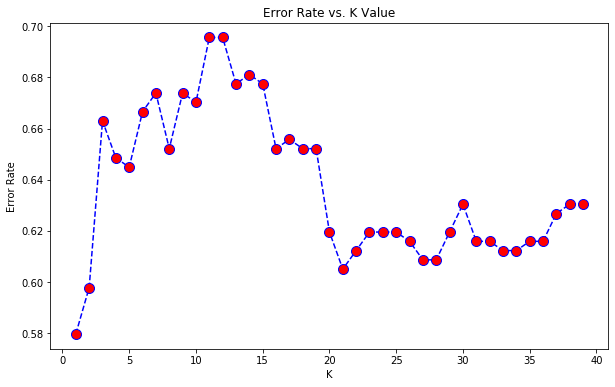

In [151]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Decision Tree Classifier

### RandomOverSampler

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dtree = DecisionTreeClassifier()

In [154]:
dtree.fit(X_train_ros,y_train_ros)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
predictions = dtree.predict(X_test)

In [156]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.24      0.24      0.24        17
        2.0       0.83      0.79      0.81       217
        3.0       0.40      0.34      0.37        35
        4.0       0.14      0.43      0.21         7

avg / total       0.72      0.69      0.70       276



In [157]:
print(confusion_matrix(y_test,predictions))

[[  4  12   0   1]
 [ 12 172  18  15]
 [  1  19  12   3]
 [  0   4   0   3]]


### SMOTETomek

In [158]:
dtree.fit(X_train_smk,y_train_smk)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [159]:
predict_smote = dtree.predict(X_test)

In [160]:
print(classification_report(y_test,predict_smote))

             precision    recall  f1-score   support

        1.0       0.26      0.35      0.30        17
        2.0       0.83      0.79      0.81       217
        3.0       0.44      0.34      0.39        35
        4.0       0.15      0.43      0.22         7

avg / total       0.73      0.70      0.71       276



In [196]:
print(confusion_matrix(y_test,predict_smote))

[[  6   9   0   2]
 [ 17 172  15  13]
 [  0  21  12   2]
 [  0   4   0   3]]


## Random Forest Classifier

### RandomOverSampler

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
rfc = RandomForestClassifier(n_estimators=600)

In [163]:
rfc.fit(X_train_ros,y_train_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [164]:
predictions = rfc.predict(X_test)

In [165]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.21      0.18      0.19        17
        2.0       0.82      0.88      0.84       217
        3.0       0.48      0.29      0.36        35
        4.0       0.38      0.43      0.40         7

avg / total       0.72      0.75      0.73       276



In [166]:
print(confusion_matrix(y_test,predictions))

[[  3  14   0   0]
 [ 11 190  11   5]
 [  0  25  10   0]
 [  0   4   0   3]]


In [167]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions})
error.head(10)

Actual Values  Predicted Values
0            2.0               2.0
1            1.0               2.0
2            2.0               2.0
3            2.0               3.0
4            2.0               2.0
5            2.0               2.0
6            2.0               2.0
7            2.0               2.0
8            2.0               2.0
9            2.0               4.0

### SMOTETomek

In [168]:
rfc.fit(X_train_smk,y_train_smk)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [169]:
predict_rfc = rfc.predict(X_test)

In [170]:
print(classification_report(y_test,predict_rfc))

             precision    recall  f1-score   support

        1.0       0.27      0.18      0.21        17
        2.0       0.82      0.91      0.86       217
        3.0       0.59      0.29      0.38        35
        4.0       0.43      0.43      0.43         7

avg / total       0.75      0.78      0.75       276



In [190]:
print(confusion_matrix(y_test,predict_rfc))

[[  3  14   0   0]
 [  8 198   7   4]
 [  0  25  10   0]
 [  0   4   0   3]]


## Logistic Regression

### RandomOverSampler

In [172]:
from sklearn.linear_model import LogisticRegression

In [173]:
logmodel = LogisticRegression()
logmodel.fit(X_train_ros,y_train_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [191]:
predictions = logmodel.predict(X_test)

In [175]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.09      0.41      0.15        17
        2.0       0.83      0.45      0.59       217
        3.0       0.17      0.23      0.20        35
        4.0       0.08      0.43      0.14         7

avg / total       0.68      0.42      0.50       276



In [192]:
print(confusion_matrix(y_test,predictions))

[[ 6  8  1  2]
 [68 85 42 22]
 [ 6  9  6 14]
 [ 1  2  1  3]]


## SMOTETomek

In [176]:
logmodel.fit(X_train_smk,y_train_smk)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [193]:
predictions = logmodel.predict(X_test)

In [178]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.07      0.35      0.12        17
        2.0       0.82      0.39      0.53       217
        3.0       0.12      0.17      0.14        35
        4.0       0.07      0.43      0.12         7

avg / total       0.66      0.36      0.44       276



In [195]:
print(confusion_matrix(y_test,predictions))

[[ 6  8  1  2]
 [68 85 42 22]
 [ 6  9  6 14]
 [ 1  2  1  3]]


# Conclusion

- In conclusion, the random forest classification performed the best at an average F1 score of 0.75 or 75%. The precision, recall and F1-score for each class is shown below:

In [188]:
print(classification_report(y_test,predict_rfc))

             precision    recall  f1-score   support

        1.0       0.27      0.18      0.21        17
        2.0       0.82      0.91      0.86       217
        3.0       0.59      0.29      0.38        35
        4.0       0.43      0.43      0.43         7

avg / total       0.75      0.78      0.75       276



In [189]:
error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predict_rfc})
error.head(10)

Actual Values  Predicted Values
0            2.0               2.0
1            1.0               2.0
2            2.0               2.0
3            2.0               3.0
4            2.0               2.0
5            2.0               2.0
6            2.0               2.0
7            2.0               2.0
8            2.0               2.0
9            2.0               4.0

- From the classification report we can see that the Random Forest Classifier partnered with the SMOTETomek imbalanced learning performed the best. 
- The average precision score was 0.75 (75%) and average recall score 0.78 (78%)
- **What does this mean for our analysis?**
    - To understand this better, we will need to look at the confusion matrix shown below:

In [197]:
print(confusion_matrix(y_test,predict_rfc))

[[  3  14   0   0]
 [  8 198   7   4]
 [  0  25  10   0]
 [  0   4   0   3]]


- The precision score tells us, of all the restaurant prices we predicted using the model, what fraction or percentage was actaully true?
- In other words, it is the True Positives/(True Positives + False Positives)
- In our model, the precision score is separated by the price ranges (1-4) and each precision score is represented respectively

- The recall score tells us, of all the restaurants that gave it's price listings, what fraction did we correctly predict the price using our model?
- In other words, it is the True Positives/(True Positives + False Negatives)

### Testing some new data on model

In [225]:
rest = X_test[(X_test['Cuisine_Asian'] == 1) & (X_test['Neighbourhood_Yorkville'] == 1)]

In [226]:
rest.iloc[0,84] = 0
rest.iloc[0,83] = 1
rest.iloc[0,0] = 107
rest.iloc[0,1] = 3.0

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [227]:
rest

# of Reviews  Rating  Cuisine_African  Cuisine_American  Cuisine_Asian  \
79           107     3.0                0                 0              1   

    Cuisine_Carribean  Cuisine_European  Cuisine_Mexican  \
79                  0                 0                0   

    Cuisine_Middle Eastern  Cuisine_Other  ...  \
79                       0              0  ...   

    Neighbourhood_University of Toronto  Neighbourhood_Upper Beach  \
79                                    0                          0   

    Neighbourhood_West Don Lands  Neighbourhood_West Queen West  \
79                             0                              0   

    Neighbourhood_Willowdale  Neighbourhood_Wychwood  \
79                         0                       0   

    Neighbourhood_Yonge and Eglinton  Neighbourhood_Yonge and St. Clair  \
79                                 0                                  0   

    Neighbourhood_York  Neighbourhood_Yorkville  
79                   1                        0  

[1 rows x 85 columns]

In [228]:
# new_data to predict an Asian Restaurant with 107 reviews, a rating of 3, in the 'York' Neighbourhood
rfc.predict(rest)

array([2.])

- The model predicts that an Asian Restaurant with 107 reviews and a rating of 3.0 in the York Neighbourhood would have a price of 2 ($$)